In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("clean_lyrics.csv")

In [7]:
df

,Unnamed: 0,Band,Lyrics,Song
0,0,Elijah Blake,No no I ai ever trapped out the bando But oh L...,Everyday
1,1,Elijah Blake,The go down and smoke goes up I feel myself go...,Live Till We Die
2,2,Elijah Blake,She do live on planet Earth no more She found ...,The Otherside
3,3,Elijah Blake,off that low off that low off that low Baby I ...,Pinot
4,4,Elijah Blake,I see a midnight panther so gallant and so bra...,Shadows & Diamonds
...,...,...,...,...
458860,516169,Demons & Wizards,Space their true asylum The ancient they trave...,Spatial Architects [*]
458861,516170,Demons & Wizards,The ocean beauty No longer my heart It black a...,Beneath These Waves
458862,516171,Demons & Wizards,Show me your banner Come show me your sign The...,Crimson King
458863,516172,Demons & Wizards,Amuse me Sweet son of love Sweet son of death ...,Dorian


In [8]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
male = ['The Beatles', 'Elvis Presley', 'Michael Jackson', 'Elton John', 'Led Zeppelin', 'Pink Floyd', 'Eminem',
        'Eagles', 'Queen', 'Metallica', 'The Rolling Stones', 'Drake', 'Garth Brooks', 'Kanye West', 'Justin Bieber',
        'Ed Sheeran', 'Billy Joel', 'U2', 'Phil Collins', 'Aerosmith', 'Frank Sinatra', 'Chris Brown', 
        'Bruce Springsteen', 'Bruno Mars', 'Lil Wayne']

In [10]:
female = ['Madonna', 'Rihanna', 'Mariah Carey', 'Whitney Houston', 'Celine Dion', 'Barbra Streisand', 'Katy Perry',
          'Lady Gaga', 'Adele', 'Beyoncé', 'Nicki Minaj', 'Britney Spears', 'Cher', 'Olivia Newton-John',
          'Tina Turner', 'Linda Ronstadt', 'Donna Summer', 'Shania Twain', 'P!nk', 'Christina Aguilera', 'Shakira',
          'Aretha Franklin', 'Gloria Estefan', 'Enya', 'Dolly Parton']

In [11]:
top_50_df = df[df.Band.isin(male + female)]
top_50_df

,Band,Lyrics,Song
10120,The Rolling Stones,Well now meet me in the bottom Bring me my run...,Down in the Bottom
10121,The Rolling Stones,Long distance in formation give me Help me fin...,Memphis Tennessee
10122,The Rolling Stones,Bright big city Gone to my baby head Bright bi...,"Bright Lights, Big City"
10123,The Rolling Stones,As I was driving home along the boulevard late...,Cops and Robbers
10124,The Rolling Stones,daddy daddy daddy daddy I got a baby that oh s...,Diddley Daddy
...,...,...,...
446242,Elton John,When the are drawn And the light of the moon i...,Club at the End of the Street [DVD]
446243,Elton John,Here come old flat top He come up slowly He go...,Come Together [DVD]
446244,Elton John,is traveling tonight on a plane I can see the ...,Daniel [DVD]
446245,Elton John,The in the window box have to one side Everyth...,Funeral for a Friend (Love Lies Bleeding) [DVD]


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacharybrandt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '/']) 
stop_words.update(['oh', 'la', 'na', 'ooh', 'doo', 'dee', 'hoo', 'hee', 'wah', 'di', 'da', 'yeah']) 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
top_50_cv = CountVectorizer(stop_words = stop_words, min_df = 0.01, ngram_range = (1, 2))
top_50_lyrics = top_50_df.Lyrics
top_50_lyrics_cv = top_50_cv.fit_transform(top_50_lyrics)

In [15]:
top_50_lyrics_df = pd.DataFrame(top_50_lyrics_cv.toarray(), columns = top_50_cv.get_feature_names())

In [16]:
top_50_lyrics_df.head()

,across,act,admit,afraid,ago,ah,ah ah,ahead,ai,ai gon,...,wrote,ya,yea,year,yellow,yes,yesterday,yet,yo,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn.decomposition import NMF

In [166]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(top_50_lyrics_cv)

In [19]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4"],
             columns = top_50_cv.get_feature_names())
topic_word

,across,act,admit,afraid,ago,ah,ah ah,ahead,ai,ai gon,...,wrote,ya,yea,year,yellow,yes,yesterday,yet,yo,young
component_1,0.172,0.260,0.098,0.159,0.153,0.717,0.296,0.145,2.867,0.175,...,0.081,1.576,0.316,0.191,0.067,0.624,0.122,0.166,0.653,0.454
component_2,0.028,0.000,0.009,0.100,0.000,0.000,0.000,0.004,0.000,0.001,...,0.000,0.000,0.000,0.029,0.003,0.223,0.027,0.019,0.000,0.137
component_3,0.002,0.002,0.000,0.000,0.009,0.220,0.090,0.000,0.164,0.001,...,0.000,0.728,0.000,0.000,0.000,0.173,0.000,0.000,0.000,0.000
component_4,0.018,0.071,0.016,0.027,0.000,0.098,0.017,0.033,2.393,0.056,...,0.033,1.145,0.222,0.022,0.045,0.214,0.000,0.011,0.298,0.432


In [20]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [21]:
display_topics(nmf_model, top_50_cv.get_feature_names(), 10)


Topic  0
like, know, go, let, get, one, say, never, see, gon

Topic  1
love, love love, one, need, give, heart, want, time, ca, know

Topic  2
baby, baby baby, come, hey, want, take, make, hey hey, little, ya

Topic  3
got, get, ta, got ta, ai, right, girl, man, ya, make


In [22]:
from sklearn.decomposition import TruncatedSVD

In [23]:
lsa = TruncatedSVD(4)
doc_topic_lsa = lsa.fit_transform(top_50_lyrics_cv)
lsa.explained_variance_ratio_

array([0.04702496, 0.04168969, 0.02715524, 0.02071512])

In [24]:
topic_word_lsa = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4"])
topic_word_lsa

,0,1,2,3,4,5,6,7,8,9,...,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037
component_1,0.005,0.007,0.003,0.006,0.003,0.020,0.007,0.004,0.108,0.005,...,0.002,0.064,0.010,0.005,0.002,0.024,0.003,0.004,0.018,0.020
component_2,-0.002,-0.007,-0.001,0.001,-0.002,-0.015,-0.007,-0.002,-0.080,-0.003,...,-0.002,-0.044,-0.012,-0.002,-0.002,-0.004,-0.001,-0.002,-0.020,-0.008
component_3,-0.002,-0.002,-0.001,-0.002,-0.001,0.004,0.002,-0.002,-0.037,-0.002,...,-0.002,0.009,-0.006,-0.002,-0.001,-0.000,-0.001,-0.002,-0.013,-0.013
component_4,0.002,0.000,-0.000,0.002,0.003,0.007,0.002,0.003,-0.063,-0.000,...,-0.001,-0.032,-0.006,0.001,-0.001,-0.003,0.002,0.002,-0.004,-0.015


In [25]:
display_topics(lsa, top_50_cv.get_feature_names(), 10)


Topic  0
love, like, got, know, baby, get, go, let, one, want

Topic  1
love, love love, heart, need, give love, give, need love, love baby, love need, somebody

Topic  2
baby, baby baby, come, hey, want, hey hey, baby come, come come, love baby, come baby

Topic  3
let, go, let go, come, say, never, gon, know, see, go go


In [151]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                min_df = 0.01,
                                ngram_range = (1, 2))
dtm_tf = tf_vectorizer.fit_transform(top_50_lyrics)

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(top_50_lyrics)

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [153]:
from sklearn.decomposition import LatentDirichletAllocation
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [33]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.160183 -0.042278       1        1  32.008994
3      0.066715  0.004389       2        1  25.988338
0      0.082087 -0.106022       3        1  24.312327
1      0.011381  0.143911       4        1  17.690341, topic_info=      Term          Freq         Total Category  logprob  loglift
505   love  29386.000000  29386.000000  Default  30.0000  30.0000
33    baby  17236.000000  17236.000000  Default  29.0000  29.0000
341    got  19953.000000  19953.000000  Default  28.0000  28.0000
427   know  21384.000000  21384.000000  Default  27.0000  27.0000
311    get  14511.000000  14511.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
33    baby   1943.468440  17236.619965   Topic4  -4.6469  -0.4504
472   life   1390.641191   6298.155206   Topic4  -4.9816   0.2217
464    let   1585.935942  12244.428542   Topic4  -4.8502  -0.3117
579  never   1335.310558  10737.320998   Topic4  -5.0222  -0.3524
475   like   1405.928719  20607.656299   Topic4  -4.9706  -0.9528

[309 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
9         1  0.129315        alone
9         2  0.584326        alone
9         3  0.229313        alone
9         4  0.057429        alone
14        1  0.052607       always
...     ...       ...          ...
999       4  0.008583  would never
1002      1  0.029684        wrote
1002      2  0.831155        wrote
1002      3  0.133579        wrote
1002      4  0.004947        wrote

[810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [34]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.103225 -0.015625       1        1  32.463089
1     -0.022809 -0.075801       2        1  26.483599
0      0.009768  0.081329       3        1  21.485824
3     -0.090183  0.010097       4        1  19.567488, topic_info=          Term        Freq       Total Category  logprob  loglift
505       love  771.000000  771.000000  Default  30.0000  30.0000
514  love love  138.000000  138.000000  Default  29.0000  29.0000
371      heart  330.000000  330.000000  Default  28.0000  28.0000
69       bitch   82.000000   82.000000  Default  27.0000  27.0000
379        hey  169.000000  169.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
148       come   62.746627  330.253845   Topic4  -5.2362  -0.0295
883       time   62.211535  356.401028   Topic4  -5.2447  -0.1142
475       like   65.595895  502.318078   Topic4  -5.1918  -0.4044
31        away   55.678003  254.406518   Topic4  -5.3557   0.1120
236      every   54.175995  204.399633   Topic4  -5.3830   0.3035

[308 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
9         1  0.157119   alone
9         2  0.214253   alone
9         3  0.157119   alone
9         4  0.471357   alone
14        1  0.148520  always
...     ...       ...     ...
998       3  0.111328   would
998       4  0.355393   would
1005      1  0.194990  yellow
1005      3  0.779959  yellow
1005      4  0.038998  yellow

[789 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [154]:
from wordcloud import WordCloud
terms = tf_vectorizer.get_feature_names()

Topic#  1
night,well,home,one,like,come,man,old,town,sun,away,day,little,sing,see,time,light,back,lord,way,got,rain,love,sky,hear,long,get,let,wind,born,tonight,world,know,street,never,around,comes,days,king,road,life,good,child,high,new,gon,could,take,every,people,black,said,lady,cold,morning,sweet,fly,god,white,blue,heart,two,find,still,going,gone,city,lonely,dark,blues,summer,look,river,song,mother,walk,train,sea,snow,bright,sleep,place,son,left,meet,right,lay,land,across,face,young,free,fire,make,upon,baby,another,say,mind,ride

Topic#  2
love,know,baby,way,time,never,say,heart,one,need,love love,got,want,give,let,make,feel,gon,like,long,life,always,away,take,could,see,day,tell,find,back,would,think,nothing,ever,loving,believe,world,good,every,try,girl,come,keep,cry,true,forever,hold,mind,much,something,someone,chorus,right,yes,still,get,really,fool,easy,enough,look,remember,everything,stay,change,fall,wrong,kiss,around,without,well,together,said,please,somebody,maybe,stop,forget,m

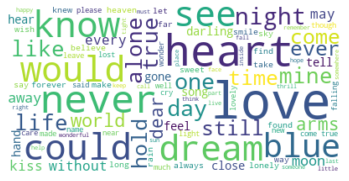

In [155]:
terms_count = 100
#Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda_tfidf.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=60,min_font_size=1,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")

In [29]:
topic_values = lda_tfidf.transform(dtm_tf)
topic_values = np.argmax(topic_values, axis = 1)

In [30]:
H = pd.DataFrame(topic_values,
             index = top_50_df.Song)

In [31]:
topic_df = H.reset_index()

In [32]:
plot_topic_df = pd.merge(top_50_df,topic_df,on='Song')

In [33]:
plot_topic_df.rename(columns = {0: 'Topic'}, inplace = True)
plot_topic_df

,Band,Lyrics,Song,Topic
0,The Rolling Stones,Well now meet me in the bottom Bring me my run...,Down in the Bottom,2
1,The Rolling Stones,Long distance in formation give me Help me fin...,Memphis Tennessee,2
2,The Rolling Stones,Long distance in formation give me Help me fin...,Memphis Tennessee,2
3,Elvis Presley,Long distance information give me Help me find...,Memphis Tennessee,2
4,Elvis Presley,Long distance information give me Help me find...,Memphis Tennessee,2
...,...,...,...,...
15884,Elton John,When the are drawn And the light of the moon i...,Club at the End of the Street [DVD],0
15885,Elton John,Here come old flat top He come up slowly He go...,Come Together [DVD],2
15886,Elton John,is traveling tonight on a plane I can see the ...,Daniel [DVD],3
15887,Elton John,The in the window box have to one side Everyth...,Funeral for a Friend (Love Lies Bleeding) [DVD],3


In [34]:
plot_topic_df['Gender'] = np.where(plot_topic_df.Band.isin(male), 0, 1)

In [35]:
plot_topic_df

,Band,Lyrics,Song,Topic,Gender
0,The Rolling Stones,Well now meet me in the bottom Bring me my run...,Down in the Bottom,2,0
1,The Rolling Stones,Long distance in formation give me Help me fin...,Memphis Tennessee,2,0
2,The Rolling Stones,Long distance in formation give me Help me fin...,Memphis Tennessee,2,0
3,Elvis Presley,Long distance information give me Help me find...,Memphis Tennessee,2,0
4,Elvis Presley,Long distance information give me Help me find...,Memphis Tennessee,2,0
...,...,...,...,...,...
15884,Elton John,When the are drawn And the light of the moon i...,Club at the End of the Street [DVD],0,0
15885,Elton John,Here come old flat top He come up slowly He go...,Come Together [DVD],2,0
15886,Elton John,is traveling tonight on a plane I can see the ...,Daniel [DVD],3,0
15887,Elton John,The in the window box have to one side Everyth...,Funeral for a Friend (Love Lies Bleeding) [DVD],3,0


In [36]:
plot_topic_df.Topic.replace([0, 1, 2, 3], ['Party', 'Love', 'Hip-Hop', 'Heartbreak'], inplace = True)

In [37]:
plot_topic_df.Gender.replace([0, 1], ['Male', 'Female'], inplace = True)

In [159]:
plot_topic_df.to_csv('plot_topic_df')

In [39]:
plot_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15889 entries, 0 to 15888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Band    15889 non-null  object
 1   Lyrics  15889 non-null  object
 2   Song    15889 non-null  object
 3   Topic   15889 non-null  object
 4   Gender  15889 non-null  object
dtypes: object(5)
memory usage: 744.8+ KB


In [40]:
plot_topic_df.Song

0                                     Down in the Bottom
1                                      Memphis Tennessee
2                                      Memphis Tennessee
3                                      Memphis Tennessee
4                                      Memphis Tennessee
                              ...                       
15884                Club at the End of the Street [DVD]
15885                                Come Together [DVD]
15886                                       Daniel [DVD]
15887    Funeral for a Friend (Love Lies Bleeding) [DVD]
15888    I Guess That's Why They Call It the Blues [DVD]
Name: Song, Length: 15889, dtype: object

In [41]:
male_df = plot_topic_df[plot_topic_df.Gender == 'Male']

In [42]:
male_lyrics = male_df.Lyrics

In [43]:
tf_vectorizer_m = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                min_df = 0.01,
                                ngram_range = (1, 2))
dtm_tf_m = tf_vectorizer_m.fit_transform(male_lyrics)

In [44]:
tfidf_vectorizer_m = TfidfVectorizer(**tf_vectorizer_m.get_params())
dtm_tfidf_m = tfidf_vectorizer_m.fit_transform(male_lyrics)

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [48]:
lda_tfidf_m = LatentDirichletAllocation(n_components=1, random_state=0)
lda_tfidf_m.fit(dtm_tfidf_m)

LatentDirichletAllocation(n_components=1, random_state=0)

Topic#  1
love,know,got,like,baby,get,never,one,let,time,see,want,say,come,way,girl,heart,night,back,make,gon,well,take,could,tell,day,right,man,life,away,need,little,would,long,world,give,good,feel,think,still,said,home,every,ever,look,hey,always,hear,find,keep,tonight,around,wan,gone,much,hold,old,nothing,mind,mine,really,blue,believe,call,better,leave,true,please,people,new,cause,yes,thing,dream,two,may,something,money,stop,everything,kiss,alone,put,stay,god,try,made,hand,going,light,bad,without,sun,face,sweet,another,care,love love,lonely,live



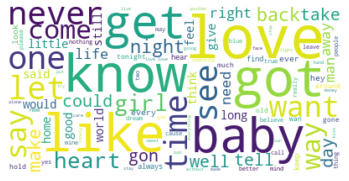

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
terms = tf_vectorizer_m.get_feature_names()
terms_count = 100
#Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda_tfidf_m.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=70,min_font_size=1,prefer_horizontal=0.9,
                        contour_width=5,contour_color='black')
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")

/Users/zacharybrandt/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


Topic#  1
love,know,baby,like,got,let,want,one,never,time,get,come,way,heart,gon,see,make,night,say,could,feel,take,life,need,away,give,right,back,tell,day,world,would,chorus,think,every,good,find,little,still,ever,always,man,wan,long,keep,girl,home,believe,look,hear,tonight,nothing,boy,hey,around,hold,said,something,well,love love,mind,cry,better,really,light,try,without,everything,much,mine,even,alone,sweet,please,turn,dream,yes,live,gone,true,inside,someone,together,thing,forever,stay,leave,made,may,last,merry,stop,face,new,must,remember,enough,place,hard,show



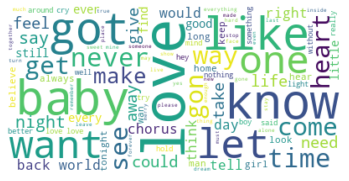

In [157]:
female_df = plot_topic_df[plot_topic_df.Gender == 'Female']

female_lyrics = female_df.Lyrics

tf_vectorizer_f = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                min_df = 0.01,
                                ngram_range = (1, 2))
dtm_tf_f = tf_vectorizer_f.fit_transform(female_lyrics)

tfidf_vectorizer_f = TfidfVectorizer(**tf_vectorizer_f.get_params())
dtm_tfidf_f = tfidf_vectorizer_f.fit_transform(female_lyrics)

lda_tfidf_f = LatentDirichletAllocation(n_components=1, random_state=0)
lda_tfidf_f.fit(dtm_tfidf_f)

import matplotlib.pyplot as plt
%matplotlib inline
terms = tf_vectorizer_f.get_feature_names()
terms_count = 100
#Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda_tfidf_f.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=70,min_font_size=1,prefer_horizontal=0.9,
                        contour_width=5,contour_color='black')
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")

Recommendation System

In [100]:
from sklearn.metrics import pairwise_distances

Text(0, 0.5, 'Explained Variance')

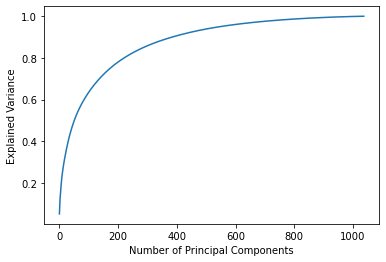

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA()

lyrics_df_pca = pca.fit_transform(top_50_lyrics_df)
exp_variances = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.plot(exp_variances);
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")

In [21]:
dists = pairwise_distances(lyrics_df_pca, metric='cosine')
dists.shape

(12967, 12967)

In [22]:
dists = pd.DataFrame(data=dists, index=top_50_df.Song, columns=top_50_df.Song)
dists

Song,Down in the Bottom,Memphis Tennessee,"Bright Lights, Big City",Cops and Robbers,Diddley Daddy,"Tell Me Baby, How Many Times",Anybody Seen My Baby? [Live],Brown Sugar [2nd Encore][Live],Gimme Shelter [Live],Honky Tonk Women [Live],...,Are You Ready for Love ['79 Radio Edit],Rocket Man 03,Blue Eyes [DVD],Can You Feel the Love Tonight? [DVD],Candle in the Wind [DVD],Club at the End of the Street [DVD],Come Together [DVD],Daniel [DVD],Funeral for a Friend (Love Lies Bleeding) [DVD],I Guess That's Why They Call It the Blues [DVD]
Song,,,,,,,,,,,,,,,,,,,,,
Down in the Bottom,0.000000,0.854540,0.956212,0.975641,0.980381,1.019954,1.015794,0.915969,1.015607,0.888492,...,1.098020,0.633301,0.975176,0.858044,0.966441,0.852032,0.821743,0.662330,1.039440,1.119394
Memphis Tennessee,0.854540,0.000000,0.966261,1.045642,0.996084,1.105326,0.950790,1.023125,1.022086,0.814619,...,1.072166,0.837981,0.966143,0.817102,0.911172,0.952336,1.066179,0.878052,1.002265,1.029135
"Bright Lights, Big City",0.956212,0.966261,0.000000,0.972464,0.716214,1.049968,0.891009,1.004952,1.025987,0.954940,...,1.092066,1.018137,0.892116,1.008221,1.054441,0.976182,1.100785,1.023422,1.053612,1.118743
Cops and Robbers,0.975641,1.045642,0.972464,0.000000,0.963002,0.873349,1.045920,0.982814,1.033851,1.049832,...,1.145613,1.020099,0.985727,1.121665,1.090072,1.025427,0.894985,1.013827,0.993370,1.086211
Diddley Daddy,0.980381,0.996084,0.716214,0.963002,0.000000,1.053300,0.940917,0.996906,1.025856,0.988802,...,1.008599,1.036583,0.916309,1.004649,1.027089,1.012978,1.035225,1.043927,1.002741,1.066025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Club at the End of the Street [DVD],0.852032,0.952336,0.976182,1.025427,1.012978,1.041271,0.970824,1.013380,1.005050,0.940013,...,1.047749,0.947375,1.015265,0.966490,0.976465,0.000000,1.043932,0.942612,0.991558,1.046486
Come Together [DVD],0.821743,1.066179,1.100785,0.894985,1.035225,0.864759,1.069774,0.856221,1.026364,1.038546,...,1.071572,1.083292,0.933426,1.063070,1.086882,1.043932,0.000000,1.075047,1.119032,1.117343
Daniel [DVD],0.662330,0.878052,1.023422,1.013827,1.043927,1.102580,0.930124,0.960578,1.016354,0.905493,...,1.042804,0.085119,0.980626,0.803809,0.829599,0.942612,1.075047,0.000000,1.068997,0.940055


In [140]:
def recommend_artist(given_song, num_recs = 3, metric='euclidean'):
    if plot_topic_df[plot_topic_df.Song == str(given_song[0])].Gender.item() == 'Male':
        to_recommend = plot_topic_df[plot_topic_df.Gender == 'Female']
    else:
        to_recommend = plot_topic_df[plot_topic_df.Gender == 'Male']
        
    to_recommend = pd.concat([to_recommend, plot_topic_df[plot_topic_df.Song == str(given_song[0])]], ignore_index = True)
    
    to_recommend.drop_duplicates(subset=['Lyrics'], inplace = True)
    
    cv = CountVectorizer(stop_words = stop_words, min_df = 0.01, ngram_range = (1, 2))
    lyrics = to_recommend.Lyrics
    to_recommend_cv_lyrics = cv.fit_transform(lyrics)
    lyrics_df = pd.DataFrame(to_recommend_cv_lyrics.toarray(), columns = cv.get_feature_names())
    lyrics_df_pca = pca.fit_transform(lyrics_df)
    
    dists = pairwise_distances(lyrics_df_pca, metric=metric)
    dists = pd.DataFrame(data=dists, index=to_recommend.Song, columns=to_recommend.Song)
    
    songs_summed = dists[given_song].sum(axis=1)
    songs_summed = songs_summed.sort_values(ascending=True)
    
    ranked_songs = songs_summed.index[~songs_summed.index.isin(given_song)]
    ranked_songs = ranked_songs.tolist()
    
    recommendations = ranked_songs[:num_recs]

    
    df_eval = to_recommend.copy()

    df_eval['rec_label'] = np.where(df_eval.Song.isin(given_song), 'Like',
                                    np.where(df_eval.Song.isin(recommendations), 'Recommended',
                                             'Other'))
    
        
    df_eval = df_eval[df_eval.rec_label.isin(['Like', 'Recommended'])]
    
    return df_eval

In [212]:
given_song = ["Tiny Dancer"]
plot_topic_df[plot_topic_df.Song == "Honkey Tonk Women"]

<ipython-input-212-a3d139798888>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_topic_df[plot_topic_df.Song == "Honkey Tonk Women"]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [207]:
Table = recommend_artist(["Tiny Dancer"])

<ipython-input-140-fe43956e73db>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if plot_topic_df[plot_topic_df.Song == str(given_song[0])].Gender.item() == 'Male':


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [160]:
import pickle 

pickle.dump(recommend_artist, open("recommend_artist.p", "wb"))

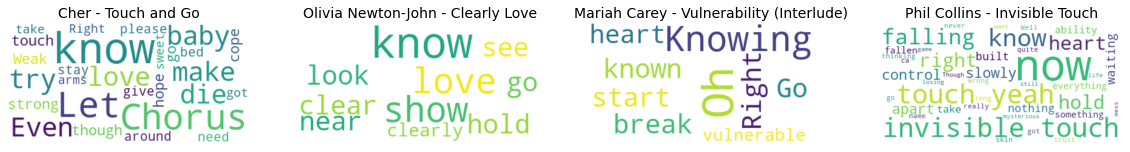

In [201]:
fig = plt.figure( figsize= (20, 10))
for index, row in Table.iterrows():
    lyrics = row['Lyrics']
    ax = fig.add_subplot(1,4,index+1)
    wordcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=70,min_font_size=1,prefer_horizontal=0.9,
                        contour_width=5,contour_color='black').generate(lyrics)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(row['Band'] + ' - ' + row['Song'], fontsize = 14)
plt.show()

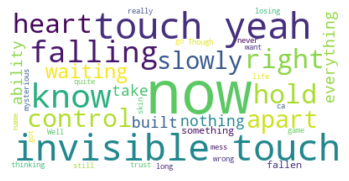

In [179]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [204]:
plot_topic_df.Song.drop_duplicates(inplace = True)
plot_topic_df.Song

0                                     Down in the Bottom
1                                      Memphis Tennessee
5                                Bright Lights, Big City
6                                       Cops and Robbers
7                                          Diddley Daddy
                              ...                       
15884                Club at the End of the Street [DVD]
15885                                Come Together [DVD]
15886                                       Daniel [DVD]
15887    Funeral for a Friend (Love Lies Bleeding) [DVD]
15888    I Guess That's Why They Call It the Blues [DVD]
Name: Song, Length: 11895, dtype: object